# Importing Packages

In [872]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [873]:
data = pd.read_csv("DataSet/train (1).csv")
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


# Information about the dataset

In [874]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


### Getting Records and Features

In [875]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [876]:
print(f'Records : {data.shape[0]}\nFeatures : {data.shape[1]}')

Records : 54808
Features : 14


# Data Cleaning and Exploratory Data Analysis

In [877]:
data.isna().any()

employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

In [878]:
missing_values = pd.DataFrame({"Percentage":(data.isna().sum()/len(data)) * 100})
missing_values.style.background_gradient(cmap
                                         ='coolwarm')

,Percentage
employee_id,0.000000
department,0.000000
region,0.000000
education,4.395344
gender,0.000000
recruitment_channel,0.000000
no_of_trainings,0.000000
age,0.000000
previous_year_rating,7.524449
length_of_service,0.000000


##### Visualization of NULL Values

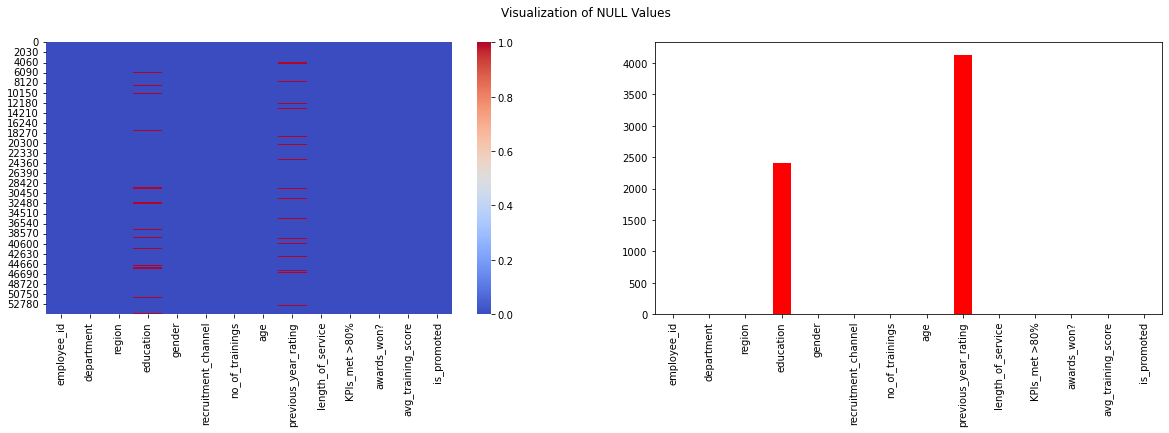

In [879]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
plt.suptitle("Visualization of NULL Values")
sns.heatmap(data.isna(),cmap='coolwarm',ax=ax1);
data.isna().sum().plot(kind='bar',color='red',ax=ax2);

### Numerical and Categorical Features Split

In [880]:
num_features = data.select_dtypes(exclude='object').columns# Numerical Features
cat_features = data.select_dtypes(include='object').columns # Categorical Features
print(f'Numerical Features : {num_features}\n\nCategorical Features : {cat_features}')

Numerical Features : Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

Categorical Features : Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')


In [881]:
num_features

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [882]:
data['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

### Distribution of Categorical Features 

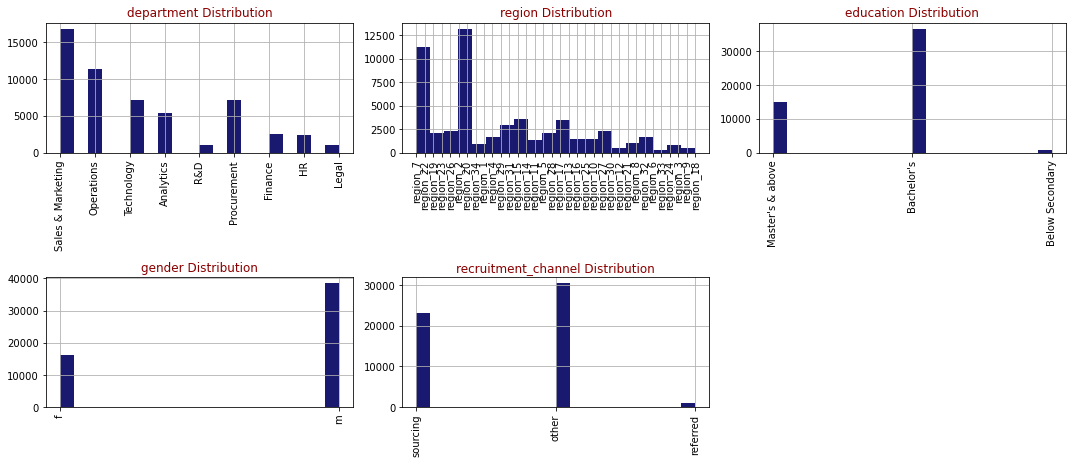

In [883]:
fig=plt.figure(figsize=(15,20))
for i, feature in enumerate(cat_features):
    ax=fig.add_subplot(rows,cols,i+1)
    data[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
    plt.xticks(rotation='vertical')
    ax.set_title(feature+" Distribution",color='DarkRed')
        
fig.tight_layout()  
plt.show()

### Distribution of numerical Features

<Figure size 1440x1440 with 0 Axes>

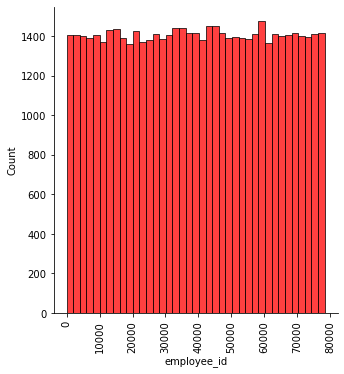

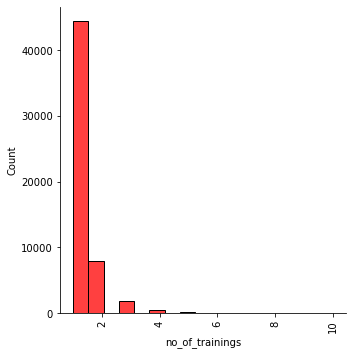

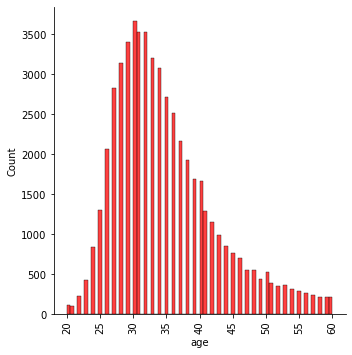

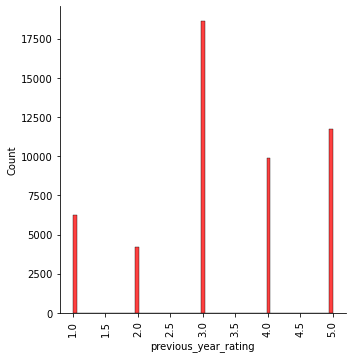

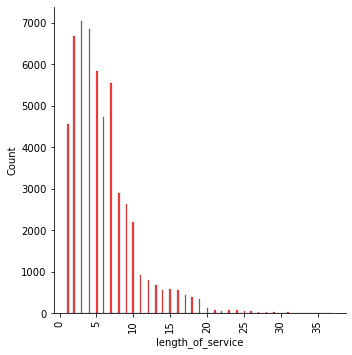

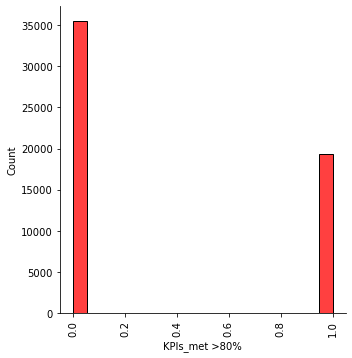

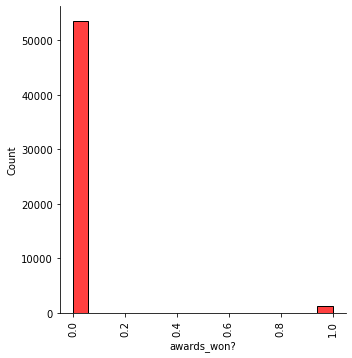

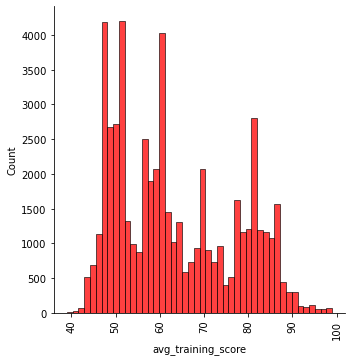

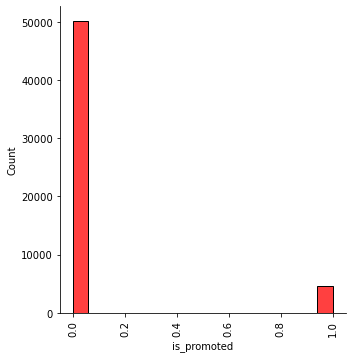

In [884]:
fig=plt.figure(figsize=(20,20))
for i, feature in enumerate(num_features):
    sns.displot(data[feature],ax=ax,color='red');
    plt.xticks(rotation='vertical')
      
plt.show()

<AxesSubplot:>

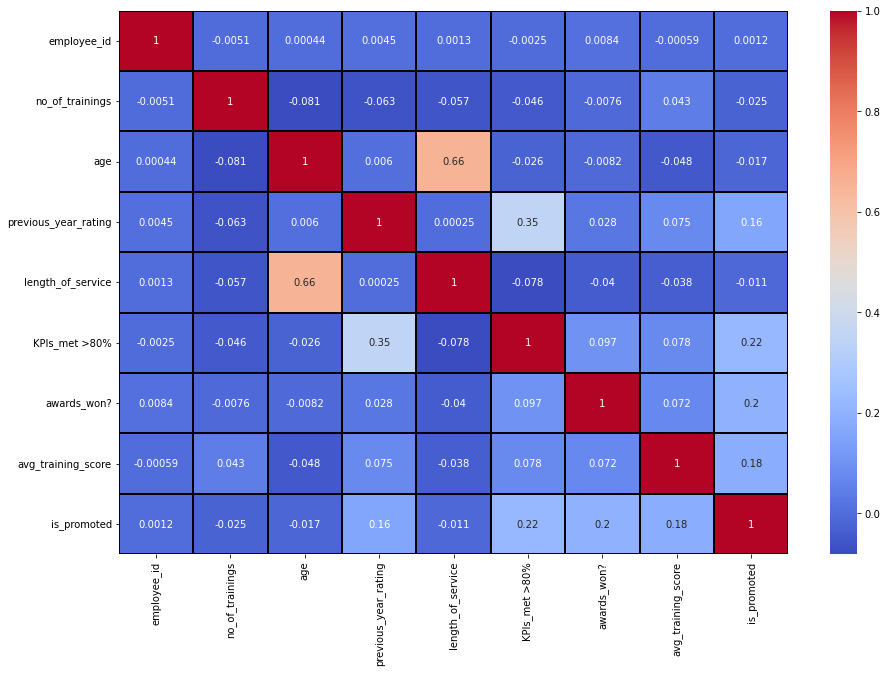

In [885]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,linewidths=0.2,linecolor='black',cmap='coolwarm')

In [886]:
data.describe().T.style.background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.000000,39195.830627,22586.581449,1.000000,19669.750000,39225.500000,58730.500000,78298.000000
no_of_trainings,54808.000000,1.253011,0.609264,1.000000,1.000000,1.000000,1.000000,10.000000
age,54808.000000,34.803915,7.660169,20.000000,29.000000,33.000000,39.000000,60.000000
previous_year_rating,50684.000000,3.329256,1.259993,1.000000,3.000000,3.000000,4.000000,5.000000
length_of_service,54808.000000,5.865512,4.265094,1.000000,3.000000,5.000000,7.000000,37.000000
KPIs_met >80%,54808.000000,0.351974,0.477590,0.000000,0.000000,0.000000,1.000000,1.000000
awards_won?,54808.000000,0.023172,0.150450,0.000000,0.000000,0.000000,0.000000,1.000000
avg_training_score,54808.000000,63.386750,13.371559,39.000000,51.000000,60.000000,76.000000,99.000000
is_promoted,54808.000000,0.085170,0.279137,0.000000,0.000000,0.000000,0.000000,1.000000


### Distribution of Target Features

##### Most of the records has not promoted

<AxesSubplot:>

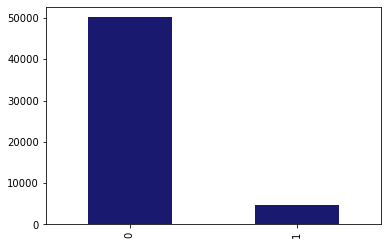

In [887]:
data['is_promoted'].value_counts().plot(kind='bar',color='midnightblue')

### Distribution of Age Feature

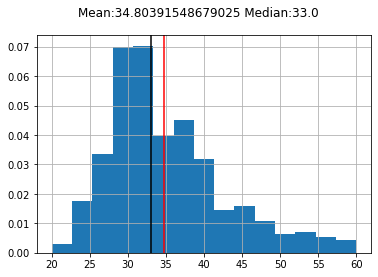

In [888]:
data['age'].hist(bins=15,density=True)
plt.axvline(data['age'].mean(),color='red')
plt.axvline(data['age'].median(),color='black')
plt.suptitle(f'Mean:{data.age.mean()} Median:{data.age.median()}');

In [889]:
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


# Filling the missing values

In [890]:
fill_values = {'education': 'missing',
               'previous_year_rating': 0}
data = data.fillna(value=fill_values)
data.isna().any()

employee_id             False
department              False
region                  False
education               False
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating    False
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

# Data Preparation

### Gender - Feature - Binarization

<AxesSubplot:xlabel='gender', ylabel='count'>

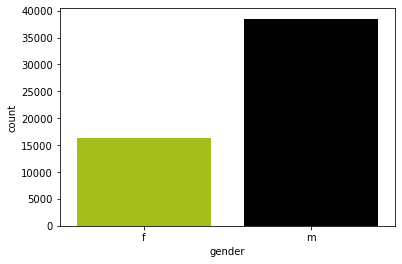

In [891]:
sns.countplot(data['gender'],palette=["#b9d801", "#000000"])

In [892]:
def gender_binarization(data,i):
    data[i] = data[i].apply(lambda x : 1 if x=='m' else 0)

In [893]:
gender_binarization(data,'gender')

### Skewed Feature transformation

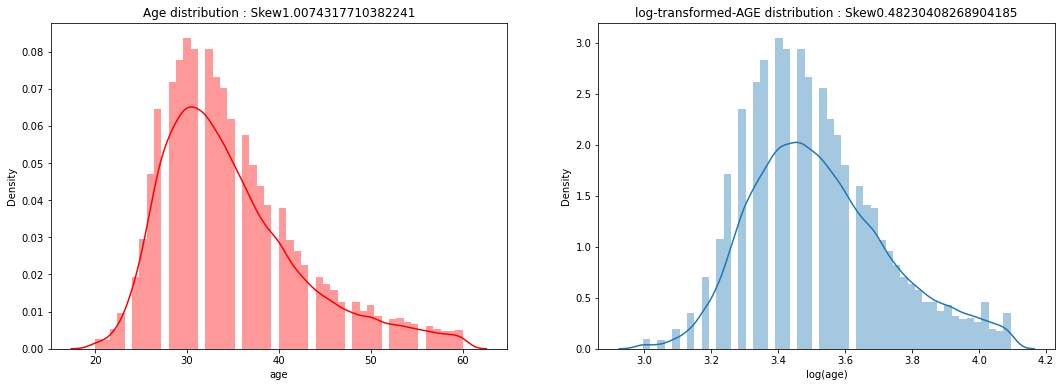

In [894]:
fig,(ax1,ax2) = plt.subplots(1, 2, figsize=(18, 6))

sns.distplot(data['age'], kde=True, ax=ax1,color='r')
ax1.set_title(f'Age distribution : Skew{data.age.skew()}')
df_ag_log = np.log(data['age']).skew()
sns.distplot(np.log(data['age']), kde=True, ax=ax2)      
ax2.set_title(f'log-transformed-AGE distribution : Skew{df_ag_log}')
ax2.set_xlabel('log(age)')

plt.show()

##### Clearly log transformation in age feature reduces skew features

In [895]:
def apply_log_to_feature(data,i):
    data[i] = np.log(data[i])

In [896]:
apply_log_to_feature(data,'age')

In [897]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  int64  
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  float64
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 5.9+ MB


In [898]:
data['age'].skew()

0.48230408268904185

In [899]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  int64  
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  float64
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 5.9+ MB


# Feature Engineering

In [900]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
cate_features = list(data.select_dtypes(include='object').columns)
for i in cate_features:
    data[i] = LE.fit_transform(data[i])

In [901]:
data.dtypes

employee_id               int64
department                int32
region                    int32
education                 int32
gender                    int64
recruitment_channel       int32
no_of_trainings           int64
age                     float64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [902]:
#dummy1=pd.get_dummies(data['recruitment_channel'])
#data = data.join(dummy1)
#data.drop('recruitment_channel',axis=1,inplace=True)

In [903]:
#dummy1=pd.get_dummies(data['department'])
#data = data.join(dummy1)
#data.drop('department',axis=1,inplace=True)

In [904]:
#dummy1=pd.get_dummies(data['region'])
#data = data.join(dummy1)
#data.drop('region',axis=1,inplace=True)

In [905]:
#dummy1=pd.get_dummies(data['education'])
#data = data.join(dummy1)
#data.drop('education',axis=1,inplace=True)

# Train Test Split

### Spliting Target Features

In [906]:
x = data.drop(columns=['employee_id','is_promoted'])
y = data['is_promoted']

In [907]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=9)
print(f'Training Records : {x_train.shape[0]}\nTesting Records : {x_test.shape[0]}')

Training Records : 38365
Testing Records : 16443


In [908]:
data.dtypes

employee_id               int64
department                int32
region                    int32
education                 int32
gender                    int64
recruitment_channel       int32
no_of_trainings           int64
age                     float64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

# Feature Selection

In [909]:
from sklearn.ensemble import RandomForestClassifier
def feature_selection(x_train,y_train):
    model = RandomForestClassifier()
    model.fit(x_train,y_train)
    get_importance = model.feature_importances_
    important_feature = pd.DataFrame({"Features" : x_train.columns,"Feature Importances" : get_importance*100})
    important_feature.set_index('Feature Importances')
    return important_feature

In [910]:
important_feature = feature_selection(x_train,y_train)
important_feature.sort_values(by='Feature Importances',ascending=False).style.background_gradient(cmap='coolwarm')

,Features,Feature Importances
11,avg_training_score,29.444222
6,age,14.105934
1,region,12.279263
8,length_of_service,10.126543
0,department,9.912844
7,previous_year_rating,5.546215
9,KPIs_met >80%,4.727416
4,recruitment_channel,3.263170
10,awards_won?,3.086739
5,no_of_trainings,2.597047


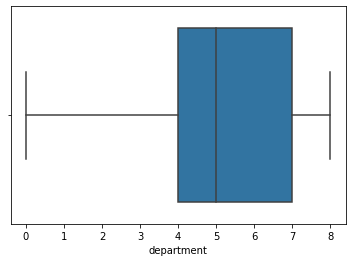

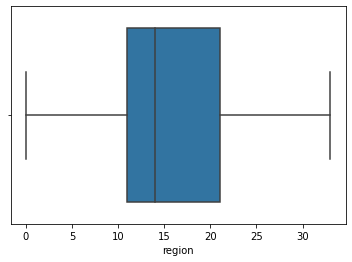

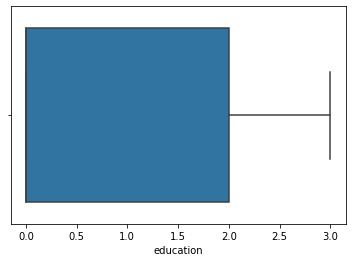

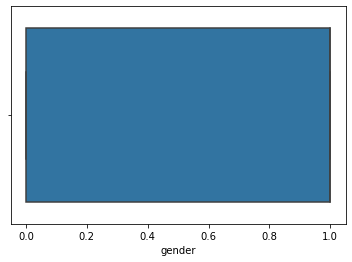

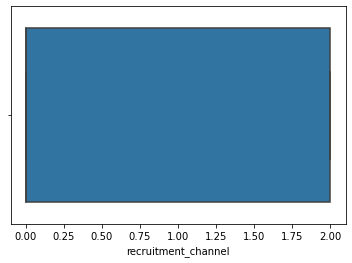

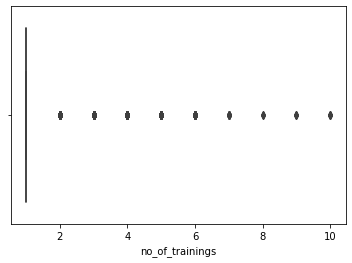

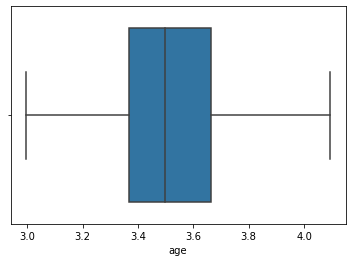

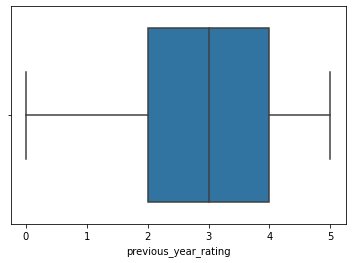

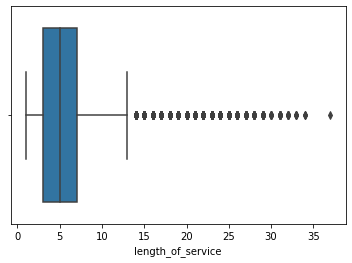

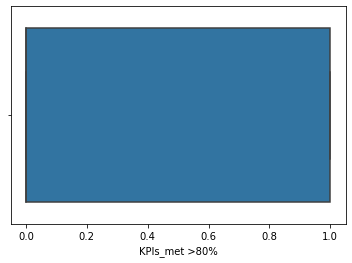

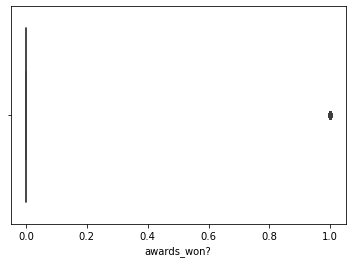

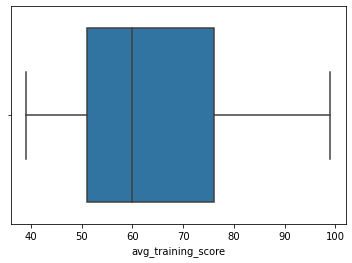

In [911]:
for i in x_train.columns:
    plt.subplots()
    sns.boxplot(x_train[i])

# Feature Scalling

In [912]:
from sklearn.preprocessing import StandardScaler
Ms = StandardScaler()
x_train = Ms.fit_transform(x_train)
x_test = Ms.transform(x_test)

In [913]:
x_train

array([[ 1.20523345,  1.55315528, -0.68408592, ..., -0.74105474,
        -0.15595887,  0.94200964],
       [-0.387587  , -0.15988363,  1.29025819, ..., -0.74105474,
        -0.15595887, -0.6992279 ],
       [ 0.80702834,  1.43895269, -0.68408592, ..., -0.74105474,
        -0.15595887, -0.99763473],
       ...,
       [ 0.01061811, -0.50249142, -0.68408592, ..., -0.74105474,
        -0.15595887,  0.64360282],
       [ 0.80702834, -1.41611217, -0.68408592, ...,  1.34942798,
        -0.15595887, -0.99763473],
       [-1.98040746,  0.63953453, -0.68408592, ..., -0.74105474,
        -0.15595887,  1.38961988]])

# Logistic Regression Model Building

In [914]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

##### Prediction

In [915]:
y_pred = LR.predict(x_test)

In [916]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Model Metrices

##### Accuracy Score

In [917]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

91.64994222465486

##### Classification Report

In [918]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve
pred_report = classification_report(y_pred,y_test)
print(pred_report)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     16316
           1       0.06      0.61      0.10       127

    accuracy                           0.92     16443
   macro avg       0.53      0.76      0.53     16443
weighted avg       0.99      0.92      0.95     16443



##### Confusion Matrix

<AxesSubplot:>

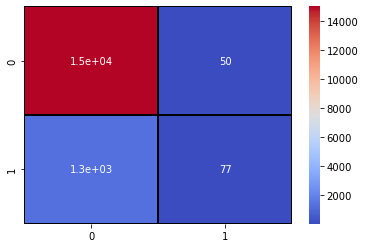

In [919]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,linewidths=0.2,linecolor='black',cmap='coolwarm')

### AUC - Curve

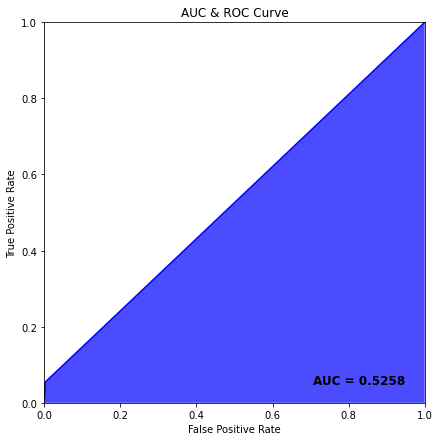

In [920]:
auc = roc_auc_score(y_test,y_pred)
fp_rate,tp_rate,thresholds = roc_curve(y_test,y_pred)
plt.figure(figsize=(15,7))
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fp_rate, tp_rate, 'b')
plt.fill_between(fp_rate, tp_rate, facecolor='blue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [921]:
roc_auc_score(y_test,y_pred)

0.5258380974539653

# Working With Testing DataSet

In [922]:
test_data = pd.read_csv('DataSet/test (1).csv')
test_data.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [923]:
print(f'Records:{test_data.shape[0]}\nFeatures:{test_data.shape[1]}')

Records:23490
Features:13


# Data Cleaning - Test Data

In [924]:
#Checking for Null Values
test_data.isna().any()

employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
dtype: bool

In [925]:
ms_test_data = pd.DataFrame({'Percentage':(test_data.isna().sum() / len(test_data)) *100},index=test_data.columns)
ms_test_data.style.background_gradient(cmap='coolwarm')

,Percentage
employee_id,0.000000
department,0.000000
region,0.000000
education,4.401873
gender,0.000000
recruitment_channel,0.000000
no_of_trainings,0.000000
age,0.000000
previous_year_rating,7.713921
length_of_service,0.000000


In [926]:
test_data = test_data.dropna()

In [927]:
test_data.isna().any()

employee_id             False
department              False
region                  False
education               False
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating    False
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
dtype: bool

# Feature Scalling

In [928]:
gender_binarization(test_data,'gender')

In [929]:
apply_log_to_feature(test_data,'age')

In [930]:
cate_features = list(test_data.select_dtypes(include='object').columns)
for i in cate_features:
    test_data[i] = LE.fit_transform(test_data[i])

In [931]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  int32  
 2   region                54808 non-null  int32  
 3   education             54808 non-null  int32  
 4   gender                54808 non-null  int64  
 5   recruitment_channel   54808 non-null  int32  
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  float64
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(2), int32(4), int64(8)
memory usage: 5.0 MB


In [932]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20819 entries, 1 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           20819 non-null  int64  
 1   department            20819 non-null  int32  
 2   region                20819 non-null  int32  
 3   education             20819 non-null  int32  
 4   gender                20819 non-null  int64  
 5   recruitment_channel   20819 non-null  int32  
 6   no_of_trainings       20819 non-null  int64  
 7   age                   20819 non-null  float64
 8   previous_year_rating  20819 non-null  float64
 9   length_of_service     20819 non-null  int64  
 10  KPIs_met >80%         20819 non-null  int64  
 11  awards_won?           20819 non-null  int64  
 12  avg_training_score    20819 non-null  int64  
dtypes: float64(2), int32(4), int64(7)
memory usage: 1.9 MB


In [933]:
test_data.drop(columns='employee_id',inplace=True)

In [934]:
#scalling test data records with standard scaler
ms_test_sc = StandardScaler()
test_data = test_data.values
test_data = ms_test_sc.fit_transform(test_data)

In [935]:
test_data

array([[-1.18849603,  1.43479131, -0.68108848, ..., -0.75392599,
        -0.15460282, -0.93598885],
       [ 0.82109568, -1.30248962, -0.68108848, ..., -0.75392599,
        -0.15460282, -1.23710728],
       [ 0.01725899, -0.50411601, -0.68108848, ..., -0.75392599,
        -0.15460282,  0.11792564],
       ...,
       [ 1.22301402,  0.18020422, -0.68108848, ..., -0.75392599,
        -0.15460282,  0.79544209],
       [-1.18849603, -0.9603295 , -0.68108848, ..., -0.75392599,
        -0.15460282, -1.01126846],
       [ 1.22301402, -0.84627613,  1.48654602, ...,  1.32639014,
        -0.15460282,  1.92463619]])

### Prediction

In [936]:
y_pred_test = LR.predict(test_data)

In [937]:
y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [938]:
out = pd.DataFrame(y_pred_test)
out.columns = ['is_promoted']
out

,is_promoted
0,0
1,0
2,0
3,0
4,0
...,...
20814,0
20815,0
20816,0
20817,0


### Saving the Result

In [939]:
out.to_csv('Output.csv')